In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [3]:
df_comments = pd.read_csv('/content/drive/MyDrive/news_data/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

<ipython-input-3-165c5acb7e06>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/content/drive/MyDrive/news_data/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [4]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели?
2. Как выглядит архитектура модели? Насколько модель большая?
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?

1 Автора завут seara https://github.com/searayeah

2 Модель основана на архитектуре RuBERT-tiny2, которая является компактной версией BERT, оптимизированной для русского языка. Модель имеет 29,2 миллионов параметров

3 Модель обучена на объединении следующих датасетов:
Kaggle Russian News Dataset
Linis Crowd 2015
Linis Crowd 2016
RuReviews
RuSentiment
Используя эти данный модель должна хорошо класифицировать данные

**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [5]:
from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1
print(f"{'GPU' if device == 0 else 'CPU'}")

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="seara/rubert-tiny2-russian-sentiment",
    tokenizer="seara/rubert-tiny2-russian-sentiment",
    device=device
)

GPU


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
sample_comments = df_comments['text'].head(5).tolist()
results = sentiment_pipeline(sample_comments, truncation=True, max_length=512)

for comment, result in zip(sample_comments, results):
    print(comment ,result )


ЧВК Вагнера? {'label': 'neutral', 'score': 0.9122462868690491}
[id4710641|Евгений], выздоравливай. {'label': 'neutral', 'score': 0.8793703317642212}
[id442655034|Андрей], искренне желаю этого всей фабрике. {'label': 'positive', 'score': 0.6762611865997314}
Опять про Украину новости? {'label': 'neutral', 'score': 0.9259392023086548}
Че такое ДНР? {'label': 'neutral', 'score': 0.866222620010376}


Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [7]:
random_sample = df_comments.sample(16384, random_state=11112004).copy()
random_sample['sentiment_verdict'] = ''
random_sample['sentiment_score'] = 0.0

In [8]:
batch_size = 128
texts = random_sample['text'].tolist()
results = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch_texts = texts[i:i + batch_size]
    batch_results = sentiment_pipeline(batch_texts, truncation=True, max_length=512)
    results.extend(batch_results)


  0%|          | 0/128 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [9]:
random_sample['sentiment_verdict'] = [res['label'] for res in results]
random_sample['sentiment_score'] = [res['score'] for res in results]

In [10]:
print(random_sample[['text', 'sentiment_verdict', 'sentiment_score']].head())

                                                      text sentiment_verdict  \
2080598  [id156699451|Лариса], Артур,Андрей...кто еще? ...           neutral   
1732370  [id373697190|Belognev], вода вымывает клейкови...           neutral   
809294   Порошенко сам того не ведая признался в госпер...           neutral   
874584   Конченная странишка, с кучей больных на всю го...          negative   
1984260                                                  😂           neutral   

         sentiment_score  
2080598         0.885798  
1732370         0.855325  
809294          0.690726  
874584          0.855198  
1984260         0.475078  


In [11]:
output_path = '/content/drive/MyDrive/news_data/random.csv'
random_sample.to_csv(output_path, index=False, encoding='utf-8-sig')

## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [12]:
sentiment_counts = random_sample['sentiment_verdict'].value_counts(normalize=True) * 100
print("Доля комментариев по сентименту:")
print(sentiment_counts[['positive', 'neutral']])

Доля комментариев по сентименту:
sentiment_verdict
positive     7.324219
neutral     70.092773
Name: proportion, dtype: float64


In [13]:
top_positive = random_sample[random_sample['sentiment_verdict'] == 'positive'].sort_values(by='sentiment_score', ascending=False).head(10)
print(top_positive[['text', 'sentiment_score']])

                                                      text  sentiment_score
1721636                                         Отлично!💐🏆         0.996178
21299                                              Отлично         0.996048
1038682                                     Отличное утро😁         0.995975
477894                      Отлично ! Светлая память ему !         0.995885
873131                                     Отличный актер👍         0.995882
2294536               Отлично! Поздравляем Иранский народ!         0.995670
2456455  Отлично,  просто отлично,  давно пора, ответоч...         0.995401
311149                                    Отличный подарок         0.995342
956725    Это очень круто!!! как путешествие во времени✨✨✨         0.995336
2363264                      ура какая прекрассная новость         0.994962


In [14]:
top_negative = random_sample[random_sample['sentiment_verdict'] == 'neutral'].sort_values(by='sentiment_score', ascending=False).head(10)
#print(top_negative[['text', 'sentiment_score']])

__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [15]:
sentiment_summary = random_sample.groupby(['post_id', 'sentiment_verdict']).size().unstack(fill_value=0)
sentiment_summary = sentiment_summary.rename(columns={'positive': 'positive_comments', 'neutral': 'negative_comments'})

random_sample = random_sample.merge(sentiment_summary, on='post_id', how='left')

random_sample['positive_comments'] = random_sample['positive_comments'].fillna(0).astype(int)
random_sample['negative_comments'] = random_sample['negative_comments'].fillna(0).astype(int)

print(random_sample[['post_id', 'positive_comments', 'negative_comments']].head(15))


       post_id  positive_comments  negative_comments
0   19760905.0                  0                  1
1   20646463.0                  0                  6
2   22521096.0                  0                  1
3   22407412.0                  0                  0
4   20055685.0                  0                  1
5   20126305.0                  0                  0
6   20045195.0                  0                  3
7   23999979.0                  1                  2
8   21854929.0                  0                  2
9   21792439.0                  0                  2
10  20802704.0                  0                  1
11  19240675.0                  0                  1
12  18973840.0                  2                  1
13  19071169.0                  0                  2
14  21311656.0                  0                  2


__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

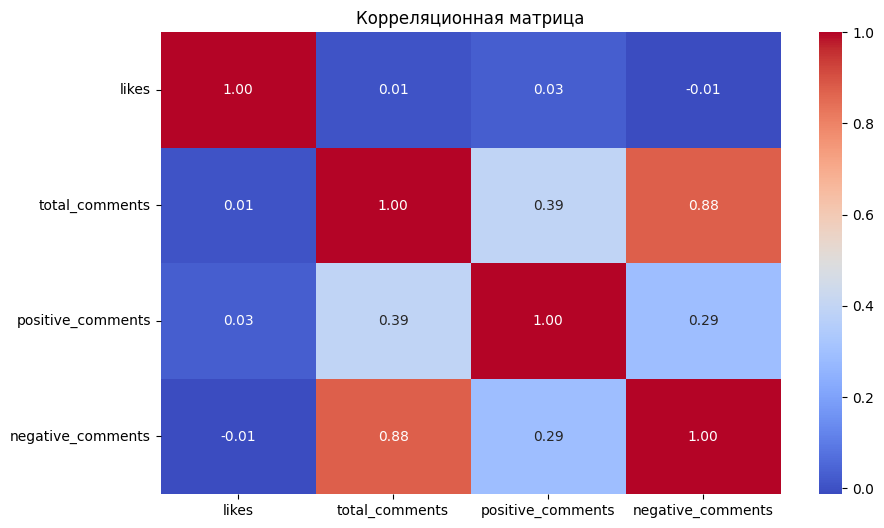

In [28]:
likes_summary = random_sample.groupby('post_id')['likes'].first().reset_index()

comments_summary = random_sample.groupby('post_id').agg(
    total_comments=('post_id', 'size'),
    positive_comments=('positive_comments', 'sum'),
    negative_comments=('negative_comments', 'sum')
).reset_index()

news_analysis = likes_summary.merge(comments_summary, on='post_id', how='left')

correlation = news_analysis[['likes', 'total_comments', 'positive_comments', 'negative_comments']].corr()
#print(correlation)

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()


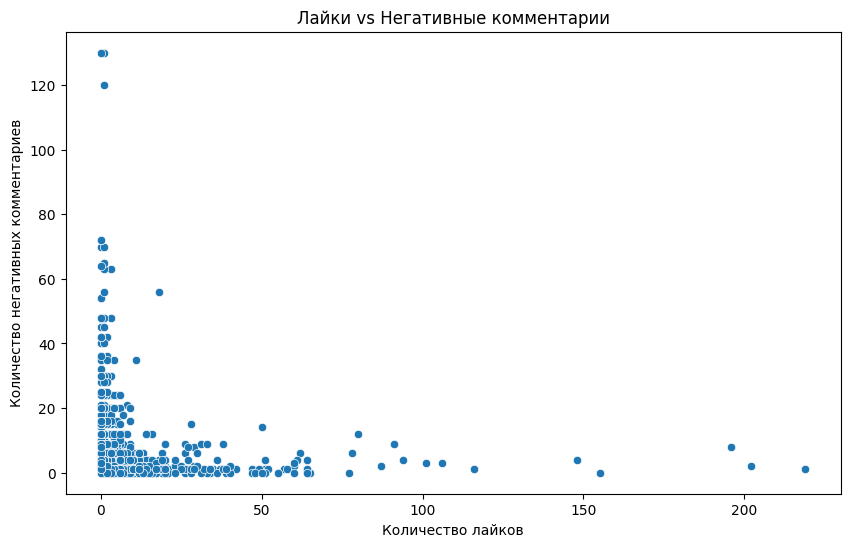

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=news_analysis, x='likes', y='negative_comments')
plt.title('Лайки vs Негативные комментарии')
plt.xlabel('Количество лайков')
plt.ylabel('Количество негативных комментариев')
plt.show()

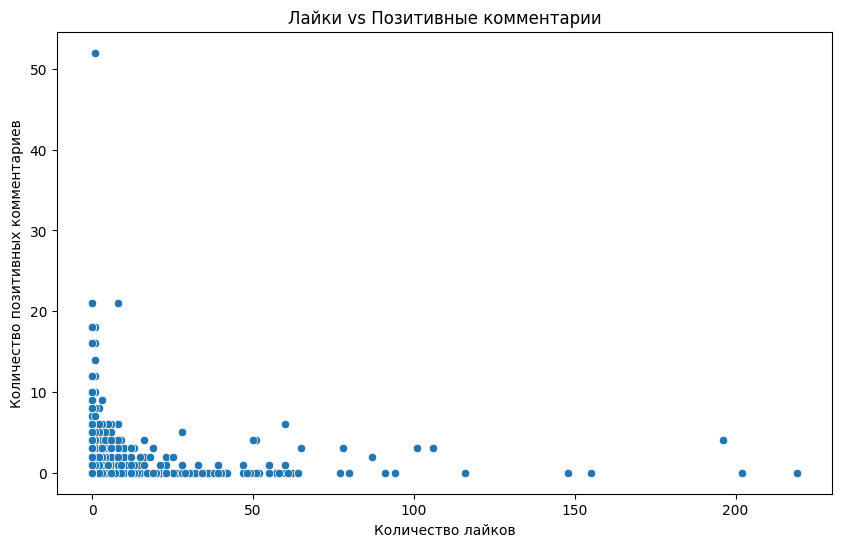

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=news_analysis, x='likes', y='positive_comments')
plt.title('Лайки vs Позитивные комментарии')
plt.xlabel('Количество лайков')
plt.ylabel('Количество позитивных комментариев')
plt.show()

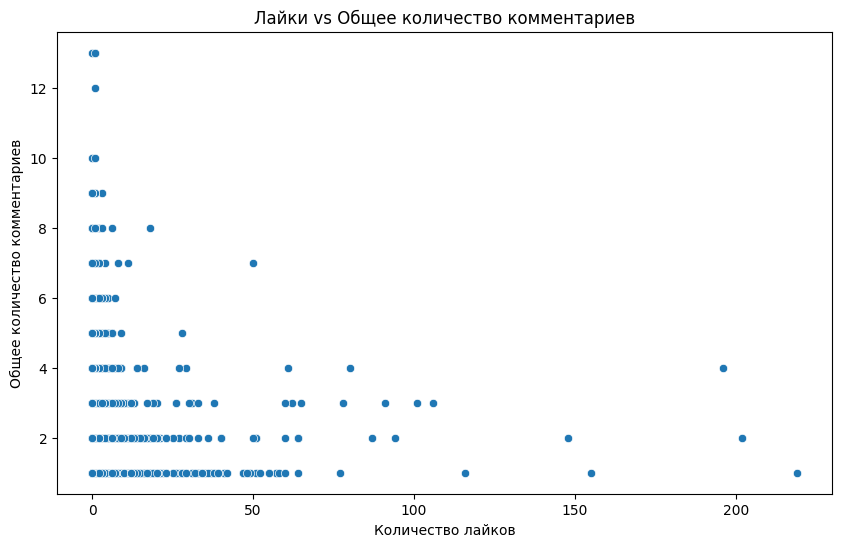

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=news_analysis, x='likes', y='total_comments')
plt.title('Лайки vs Общее количество комментариев')
plt.xlabel('Количество лайков')
plt.ylabel('Общее количество комментариев')
plt.show()

### Хочется построить прямые, но строить прямые по НАСТОЛКО не нормированным данным, кторый сосредоточены так у углов, моя душа не позволяет. Так что ограничемся утверждением корреляционная матрицы, что корреляция почти 0, и значит НЕТ НИКАКОЙ СВЯЗИ между количеством лайков и негативных коментов

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [45]:
def compute_lower_bound(u, d):
    a = 1 + u
    b = 1 + d
    proportion = a / (a + b)
    variance = (a * b) / ((a + b)**2 * (a + b + 1))
    lower_bound = proportion - 1.65 * np.sqrt(variance)
    return max(lower_bound, 0)

random_sample['lower_bound'] = random_sample.apply(
    lambda row: compute_lower_bound(row['positive_comments'], row['negative_comments']), axis=1
)

random_sample['negative_lower_bound'] = news_analysis.apply(
    lambda row: compute_lower_bound(row['negative_comments'], row['positive_comments']), axis=1
)


top_positive_news = random_sample.sort_values(by='lower_bound', ascending=False).head(10)
top_negative_news = random_sample.sort_values(by='negative_lower_bound', ascending=False).head(10)

print(top_positive_news)
#print(top_negative_news) не будем такой читать

output_top_positive = '/content/drive/MyDrive/news_data/top_positive_news.csv'
top_positive_news.to_csv(output_top_positive, index=False, encoding='utf-8-sig')


               id     post_id             datetime  \
14340    21534399  21534246.0  2018-07-07 23:05:55   
12290    22012627  22012344.0  2018-08-18 16:25:40   
3557     19377758  19377666.0  2018-01-25 07:49:02   
5611     19377730  19377666.0  2018-01-25 07:46:39   
3535   23783889.0  23778749.0  2019-01-15 13:55:48   
2375     20819966  20818274.0  2018-05-09 05:58:54   
318      18428238  18427404.0  2017-11-06 21:21:03   
799      22779197  22777411.0  2018-10-20 10:17:36   
15654    19738990  19734372.0  2018-02-23 16:18:31   
13939    20068693  20065831.0  2018-03-18 16:25:05   

                                                    text  likes  \
14340                                 красива так и надо    0.0   
12290  Поздравляю от души этого прекрасного спортсмен...    1.0   
3557   Очень очень жаль, что болезнь унесла жизнь тал...    3.0   
5611    Очень жаль! Красивый голос! Вечная память!💐👏👏👏👏👏   19.0   
3535   [id63465863|Анна], Роскосмос-гигантская трансн...    1.0   
237

Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

__[0.6 балла] Задание 14:__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

__Ответ:__

In [50]:
# your code here
# ヾ(๑╹◡╹)ﾉ


#АААААА на часах 23:50, я не успел :(

__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [19]:
# your code here
# ヾ(๑╹◡╹)ﾉ